### **1. Modelos Lineales**

* Los **modelos lineales** se usan para **regresión**, es decir, para predecir un valor numérico.
* Se asume que la **variable a predecir** es una **combinación lineal** de las características (features) del dataset.
  Matemáticamente:
  
$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$


* En **scikit-learn**, los parámetros del modelo se almacenan en:

  * `coef_` → los pesos (θ₁, θ₂, …)
  * `intercept_` → el intercepto (θ₀)

Vamos a suponer un problema sencillo. Vamos a predecir la nota de un alumno en función de las horas de estudio. Supongamos que tenemos los siguientes datos de varios alumnos:


hours_studied.shape:(10,)
exam_score:[ 56.49014246  59.5852071   66.94306561  74.56908957  74.29753988
  79.29758913  89.73763845  92.30230419  93.59157684 101.62768013]


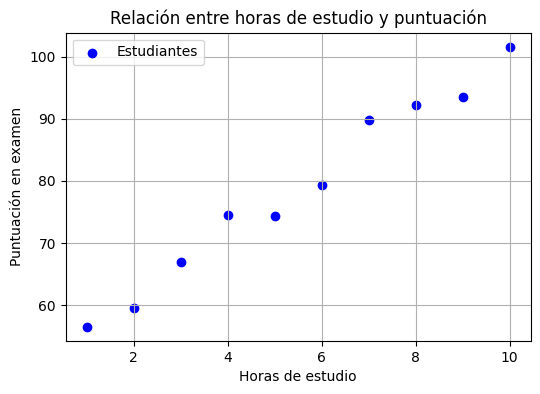

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla para reproducibilidad
np.random.seed(42)  # <- esto asegura que el ruido sea siempre el mismo

# Dataset ficticio: horas de estudio
#
# numpy.array es la función fundamental para crear arrays en NumPy
# Parámetros --> numpy.array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0, ndmax=None, like=None)
#
# object --> El dato o estructura que quieres convertir a array
# dtype=None --> Especifica el tipo de datos del array
# *
# copy=True --> Controla si se debe copiar el dato o usar la referencia
# order='K' --> el layout de memoria del array (row-mayor, column-mayor)
# subok=False --> Controla si se mantienen las subclases o se convierte a array base
# ndmin=0 --> Número mínimo de dimensiones
# ndmax=None --> Limita la profundidad máxima de dimensiones
# like=None --> Crea arrays compatibles con otros tipos de arrays
#
# El asterisco (*) en la firma de la función indica el inicio de los parámetros keyword-only (solo por nombre).
# ¿Qué significa esto?
# A partir del *, todos los parámetros DEBEN ser pasados usando su nombre explícitamente.
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Puntuación en un examen, aproximadamente lineal + ruido
exam_score = 50 + 5 * hours_studied + np.random.normal(0, 3, size=hours_studied.shape)
print("hours_studied.shape:" + str(hours_studied.shape))
print("exam_score:" + str(exam_score))

# Parámetros de np.random.normal
# loc: float o array de floats --> Media ("centro") de la distribución.
# scale: float o array de floats --> Desviación estándar (dispersión o "ancho") de la distribución. Debe ser no negativa.
# size: int o tupla de ints, opcional --> Forma de salida. Por ejemplo, si la forma es (m, n, k), se generarán m * n * k muestras.
#        Si size es None (por defecto), se devuelve un solo valor si loc y scale son ambos escalares.
#        De lo contrario, se generan np.broadcast(loc, scale).size muestras.

# Gráfico de dispersión
plt.figure(figsize=(6,4))
plt.scatter(hours_studied, exam_score, color='blue', label='Estudiantes')

# Etiquetas y título
plt.xlabel("Horas de estudio")
plt.ylabel("Puntuación en examen")
plt.title("Relación entre horas de estudio y puntuación")
plt.grid(True)
plt.legend()
plt.show()



### **1.1 Ordinary Least Squares (OLS / Mínimos Cuadrados Ordinarios)**

* **LinearRegression** ajusta un modelo lineal buscando los parámetros (θ₀, θ₁, …) que **minimizan la suma de los cuadrados de los errores** entre los valores reales y los predichos.

$$
\min_{w} \| X w - y \|_2^2
$$


* Ejemplo en código:

```python
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

print(reg.coef_)      # array([0.5, 0.5])
print(reg.intercept_) # 0.0
```

* Aquí, el modelo encuentra que cada feature contribuye por igual (0.5) y el intercepto es 0.

Modelo OLS: θ0 = 51.46, θ1 = 4.98


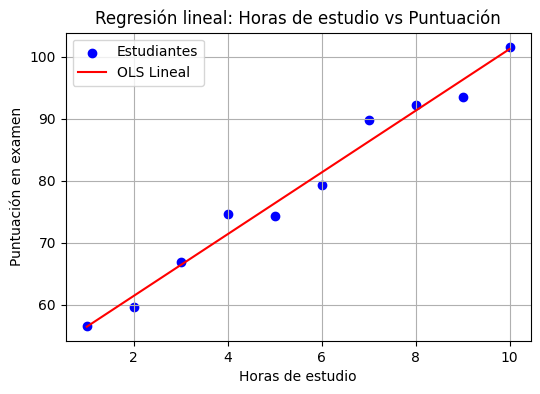

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Ajustamos el modelo OLS
X = hours_studied.reshape(-1, 1)  # scikit-learn espera una matriz 2D para las features
y = exam_score


# Explicación del reshape
# ¿Qué hace numpy.reshape? --> Cambia la forma (dimensiones) de un array sin modificar sus datos.
# numpy.reshape(a, /, shape=None, order='C', *, newshape=None, copy=None)
#
# a (array_like) --> El array que quieres redimensionar
# shape (int o tupla de ints) --> La nueva forma del array
# order ({'C', 'F', 'A'}, opcional) --> Controla el orden de lectura/escritura de los elementos
#     -'C' order (row-major) - POR DEFECTO
#     -'F' order (column-major)
# copy (bool, opcional) --> Controla si se hace copia o no:


model = LinearRegression()
model.fit(X, y)

# Coeficientes del modelo
theta_0 = model.intercept_   # Intercepto
theta_1 = model.coef_[0]     # Pendiente
print(f"Modelo OLS: θ0 = {theta_0:.2f}, θ1 = {theta_1:.2f}")

# Predicciones del modelo
y_pred = model.predict(X)

# Gráfico
plt.figure(figsize=(6,4))
plt.scatter(hours_studied, exam_score, color='blue', label='Estudiantes')  # Datos
plt.plot(hours_studied, y_pred, color='red', label='OLS Lineal')            # Línea ajustada
plt.xlabel("Horas de estudio")
plt.ylabel("Puntuación en examen")
plt.title("Regresión lineal: Horas de estudio vs Puntuación")
plt.grid(True)
plt.legend()
plt.show()


Errores (distancia vertical de cada punto a la línea):
Punto 1 (x=1): error = 0.05
Punto 2 (x=2): error = -1.83
Punto 3 (x=3): error = 0.55
Punto 4 (x=4): error = 3.19
Punto 5 (x=5): error = -2.06
Punto 6 (x=6): error = -2.04
Punto 7 (x=7): error = 3.42
Punto 8 (x=8): error = 1.01
Punto 9 (x=9): error = -2.68
Punto 10 (x=10): error = 0.38

Suma de los cuadrados de los errores (SSE): 42.31


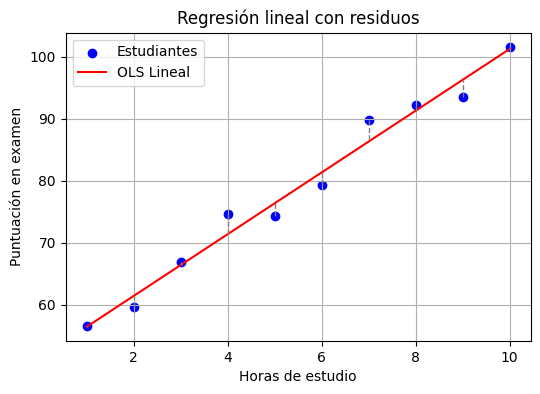

In [24]:
# Calculamos los errores/residuos
residuals = y - y_pred
print("Errores (distancia vertical de cada punto a la línea):")
for i, res in enumerate(residuals):
    print(f"Punto {i+1} (x={hours_studied[i]}): error = {res:.2f}")

# Calculamos la suma de los cuadrados de los errores
sse = np.sum(residuals**2)
print(f"\nSuma de los cuadrados de los errores (SSE): {sse:.2f}")

# Gráfico
plt.figure(figsize=(6,4))
plt.scatter(hours_studied, exam_score, color='blue', label='Estudiantes')  # Puntos
plt.plot(hours_studied, y_pred, color='red', label='OLS Lineal')            # Línea ajustada

# Dibujamos líneas de cada punto hasta la recta
for x, y_i, y_hat in zip(hours_studied, exam_score, y_pred):
    plt.plot([x, x], [y_i, y_hat], 'gray', linestyle='--', linewidth=1)

plt.xlabel("Horas de estudio")
plt.ylabel("Puntuación en examen")
plt.title("Regresión lineal con residuos")
plt.grid(True)
plt.legend()
plt.show()



Nuestro modelo:
Modelo OLS: θ0 = 51.46, θ1 = 4.98

Ha minimizado la suma de los cuadrados de los errores. Supongamos que modificamos los parámetros θ0 y θ1 para ver qué le ocurre a esta suma:

Modelo OLS original: θ0 = 51.46, θ1 = 4.98
Modelo modificado: θ0 = 54, θ1 = 6.25

Errores respecto a la nueva línea azul (distancia vertical):
Punto 1 (x=1): error = -3.76
Punto 2 (x=2): error = -6.91
Punto 3 (x=3): error = -5.81
Punto 4 (x=4): error = -4.43
Punto 5 (x=5): error = -10.95
Punto 6 (x=6): error = -12.20
Punto 7 (x=7): error = -8.01
Punto 8 (x=8): error = -11.70
Punto 9 (x=9): error = -16.66
Punto 10 (x=10): error = -14.87

SSE línea roja original: 42.31
SSE nueva línea azul: 1083.88


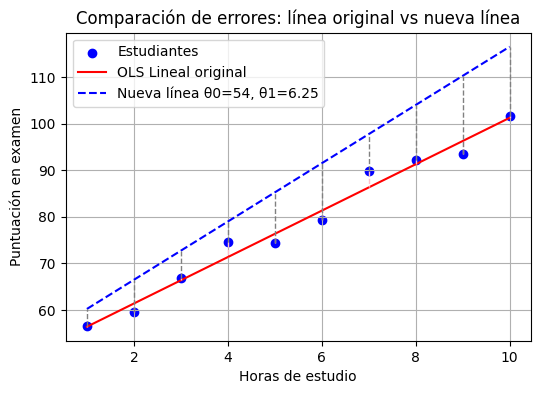

In [28]:
# Coeficientes del modelo original
theta_0 = model.intercept_   # Intercepto original
theta_1 = model.coef_[0]     # Pendiente original
print(f"Modelo OLS original: θ0 = {theta_0:.2f}, θ1 = {theta_1:.2f}")

# Nuevos parámetros para la línea azul dashed
theta_0_new = 54
theta_1_new = 6.25
print(f"Modelo modificado: θ0 = {theta_0_new}, θ1 = {theta_1_new}")

# Predicciones con la línea original (roja)
y_pred = model.predict(X)

# Predicciones con la línea modificada (azul dashed)
y_pred_new = theta_0_new + theta_1_new * hours_studied

# Calculamos los errores/residuos
residuals_original = exam_score - y_pred
residuals_new = exam_score - y_pred_new

# Imprimimos errores de la nueva línea
print("\nErrores respecto a la nueva línea azul (distancia vertical):")
for i, res in enumerate(residuals_new):
    print(f"Punto {i+1} (x={hours_studied[i]}): error = {res:.2f}")

# Suma de los cuadrados de los errores para ambas líneas
sse_original = np.sum(residuals_original**2)
sse_new = np.sum(residuals_new**2)
print(f"\nSSE línea roja original: {sse_original:.2f}")
print(f"SSE nueva línea azul: {sse_new:.2f}")

# Gráfico
plt.figure(figsize=(6,4))
plt.scatter(hours_studied, exam_score, color='blue', label='Estudiantes')           # Puntos
plt.plot(hours_studied, y_pred, color='red', label='OLS Lineal original')           # Línea roja original
plt.plot(hours_studied, y_pred_new, color='blue', linestyle='--', label='Nueva línea θ0=54, θ1=6.25')  # Línea azul

# Líneas de error para la línea roja
for x, y_i, y_hat in zip(hours_studied, exam_score, y_pred):
    plt.plot([x, x], [y_i, y_hat], 'pink', linestyle='--', linewidth=1)  # Errores rojos

# Líneas de error para la línea azul
for x, y_i, y_hat in zip(hours_studied, exam_score, y_pred_new):
    plt.plot([x, x], [y_i, y_hat], 'gray', linestyle='--', linewidth=1)  # Errores azules

plt.xlabel("Horas de estudio")
plt.ylabel("Puntuación en examen")
plt.title("Comparación de errores: línea original vs nueva línea")
plt.grid(True)
plt.legend()
plt.show()



Como se puede ver, la suma del error aumenta, porque la línea roja (la que hemos ajustado) es la línea que minimiza estos errores, por tanto, la que mejor se ajusta a los datos. Si utilizamos cualquier otra recta, esta suma de errores siempre será mayor.

### **Puntos importantes de OLS**

1. **Non-Negative Least Squares (NNLS):**

   * Se puede forzar que todos los coeficientes sean **no negativos**, útil si los parámetros representan cantidades físicas que no pueden ser negativas (ej: precios, conteos).
   * En `LinearRegression` se hace con el parámetro `positive=True`.

2. **Complejidad computacional:**

   * La solución de mínimos cuadrados se calcula usando **descomposición en valores singulares (SVD)**.
   * Si `X` es de tamaño `(n_samples, n_features)`, la complejidad es proporcional a `O(n_features^2 * n_samples + n_features^3)`.

### **Resumen**

* **LinearRegression** = busca la mejor línea que se ajuste a los datos minimizando los errores cuadrados.
* Los parámetros del modelo:

  * `coef_` = pendiente de cada feature
  * `intercept_` = valor base cuando todas las features son 0
* Problemas que pueden aparecer:

  * **Multicolinealidad** → features correlacionadas producen coeficientes inestables.
  * **Regularización / Restricciones** (como NNLS) → ayuda a que el modelo sea más estable o tenga sentido físico.
